In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='paper', style='whitegrid', rc={'figure.figsize':(21/2, 9/2), 'figure.dpi': 120})
color_palette = sns.color_palette("Set2")
sns.set_palette(color_palette)

seed_ = 20200218
np.random.seed(seed_)

import os
from PIL import Image

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.callbacks import EarlyStopping

#### tensorflow use gpu https://www.tensorflow.org/guide/gpu

In [2]:
config = tf.config.experimental.list_physical_devices('GPU')

In [3]:
train_dataset_path = "./data/train/"
val_dataset_path = "./data/val/"
test_dataset_path = "./data/test/"

In [4]:
train_data_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=(1.0/255),
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)

val_data_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=(1.0/255)
)

test_data_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=(1.0/255)
)


In [5]:
train_generator = train_data_generator.flow_from_directory(
    directory=train_dataset_path,
    class_mode='binary',
    target_size=(224, 224),
    color_mode="grayscale",
    batch_size=32,
)

val_generator = val_data_generator.flow_from_directory(
    directory=val_dataset_path,
    class_mode='binary',
    target_size=(224, 224),
    color_mode="grayscale",
)

test_generator = test_data_generator.flow_from_directory(
    directory=test_dataset_path,
    class_mode='binary',
    target_size=(224, 224),
    color_mode="grayscale",
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Model

In [6]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(5, 5), input_shape=(224, 224, 1), padding="same", activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# FC
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam' , loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 96800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               12390528  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [7]:
history = model.fit_generator(train_generator, epochs=8, validation_data=test_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8
163/163 [==============================] - 48s 296ms/step - loss: 0.5181 - accuracy: 0.7740 - val_loss: 0.4873 - val_accuracy: 0.7340
Epoch 2/8
163/163 [==============================] - 48s 296ms/step - loss: 0.3089 - accuracy: 0.8884 - val_loss: 0.4844 - val_accuracy: 0.7772
Epoch 3/8
163/163 [==============================] - 48s 292ms/step - loss: 0.2755 - accuracy: 0.9055 - val_loss: 0.4165 - val_accuracy: 0.8734
Epoch 4/8
163/163 [==============================] - 47s 291ms/step - loss: 0.2636 - accuracy: 0.9156 - val_loss: 0.5121 - val_accuracy: 0.8109
Epoch 5/8
163/163 [==============================] - 48s 296ms/step - loss: 0.2411 - accuracy: 0.9214 - val_loss: 0.5699 - val_accuracy: 0.7965
Epoch 6/8
163/163 [==============================] - 48s 296ms/step - loss: 0.2282 - accuracy: 0.9270 - val_loss: 0.5206 - val_accuracy: 0.8205
Epoch 7/8
163/163 [==============================] - 48s 296

In [8]:
model.evaluate_generator(test_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.5714011788368225, 0.8269230723381042]

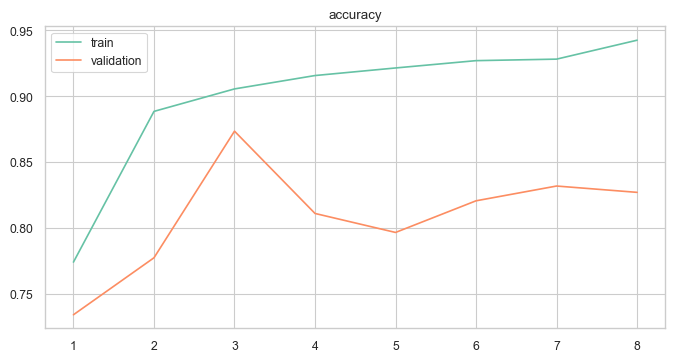

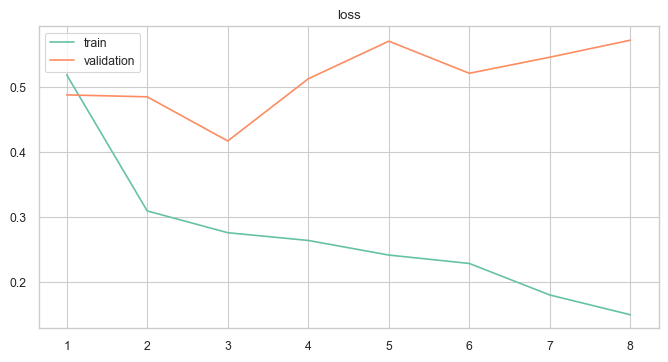

In [9]:
epoch_x = np.arange(1, len(history.history['accuracy'])+1)

plt.figure(figsize=(8, 4), dpi=100)
sns.lineplot(epoch_x, history.history['accuracy'], label='train')
sns.lineplot(epoch_x, history.history['val_accuracy'], label='validation')
plt.title('accuracy')
plt.xticks(epoch_x)
plt.show()

plt.figure(figsize=(8, 4), dpi=100)
sns.lineplot(epoch_x, history.history['loss'], label='train')
sns.lineplot(epoch_x, history.history['val_loss'], label='validation')
plt.title('loss')
plt.xticks(epoch_x)
plt.show()